# Frequencies
Understand which frequencies are most important in the time series and select them

In [1]:
from sklearn.svm import SVC
from util import FourierTransformer

import numpy as np
import pandas as pd
%load_ext autoreload
%autoreload 2

In [2]:
df_train = pd.read_csv('data\\train.csv')
# df_train.to_parquet('train.parquet')
# df_train = pd.read_parquet('train.parquet')
df_ts = df_train.iloc[:,5:] # timeseries features only
df_train['y_s'] = df_train.y > 1 # simplified y: label 0 for 1 and 1 for 2,3 

# Explore frequencies

In [19]:
%%time

FT = FourierTransformer(k=10, aggregate='low_filter')
df_f = pd.DataFrame(FT.fit_transform(df_ts.values,  df_train.y_s))

df_f

[(663, 10), (663, 10), (663, 10), (663, 10), (663, 10), (663, 10), (663, 10), (663, 10), (663, 10), (663, 10), (663, 10), (663, 10), (663, 10), (663, 10), (663, 10), (663, 10), (663, 10), (663, 10), (663, 10), (663, 10), (663, 10), (663, 10), (663, 10), (663, 10)]
CPU times: total: 1.58 s
Wall time: 2.11 s


,0,1,2,3,4,5,6,7,8,9,...,230,231,232,233,234,235,236,237,238,239
0,5.765311e-08,2.919204e-06,8.251005e-06,1.035549e-05,6.653021e-06,8.481799e-06,7.952232e-06,9.640286e-06,1.214373e-05,9.897378e-06,...,7.852335e-10,3.199072e-07,6.039295e-08,3.135831e-08,1.358186e-08,1.725900e-08,3.700053e-08,1.146261e-07,2.304017e-07,9.123036e-07
1,3.735759e-07,1.406641e-06,7.913796e-07,2.423016e-06,1.591520e-06,2.156537e-06,1.152244e-05,1.835806e-06,3.409465e-06,4.588651e-06,...,1.978937e-08,2.027243e-07,3.326645e-07,2.282503e-07,2.925776e-07,2.360653e-07,1.099575e-07,6.204401e-07,2.843420e-07,1.010755e-07
2,1.239165e-06,1.133491e-04,3.223275e-05,1.167440e-04,8.201872e-05,7.791619e-05,9.118350e-05,7.262849e-05,5.792604e-05,2.790628e-05,...,6.212056e-09,1.671696e-06,1.924085e-06,1.980974e-06,2.213376e-06,2.161989e-06,2.609704e-06,2.376046e-06,2.287409e-06,2.595447e-06
3,1.380803e-04,2.822152e-04,1.035799e-05,2.572376e-05,1.131727e-04,1.640871e-04,1.489161e-05,1.205226e-04,3.414750e-04,2.695519e-04,...,4.399250e-10,3.264216e-07,1.772827e-07,1.008903e-07,5.129502e-08,2.301374e-08,3.640019e-08,6.456776e-08,4.992351e-08,7.696737e-07
4,1.346736e-07,2.823797e-07,3.149903e-07,2.955742e-07,2.964608e-07,3.206722e-07,5.594251e-07,4.313394e-07,2.767990e-07,3.549615e-07,...,5.665347e-10,2.357067e-06,5.131995e-07,4.345855e-07,8.604716e-07,8.832054e-07,7.759231e-07,9.775222e-07,8.494950e-07,6.105446e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,5.332374e-06,9.510144e-06,4.023634e-07,2.859565e-06,3.088540e-06,1.373236e-05,5.256369e-06,2.516466e-05,2.224948e-05,1.335925e-05,...,1.077385e-09,1.412815e-06,9.521767e-07,9.388410e-07,8.757126e-07,7.502864e-07,7.470462e-07,7.868200e-07,5.182409e-07,1.559751e-06
659,3.871676e-07,4.091723e-04,1.035928e-05,1.967031e-04,7.082138e-05,4.370069e-05,5.788753e-05,5.304508e-06,2.606282e-05,6.006760e-06,...,3.886065e-09,5.947438e-06,3.581759e-06,3.607610e-06,3.819772e-06,4.200948e-06,5.371062e-06,6.119498e-06,7.725090e-06,9.894864e-06
660,1.072000e-04,1.319193e-05,7.346556e-06,1.954546e-04,1.024923e-04,1.453729e-04,3.157897e-04,1.075578e-05,2.951087e-05,1.855350e-04,...,1.523935e-07,7.754643e-07,5.562308e-07,4.909393e-07,1.005452e-06,5.145950e-07,4.781300e-07,3.790900e-07,2.132266e-07,2.360154e-07
661,2.304142e-09,2.951174e-05,3.082726e-05,2.745684e-05,2.886488e-05,3.076670e-05,1.592129e-05,2.386291e-05,3.062014e-05,2.776578e-05,...,5.732919e-10,8.397505e-07,5.012284e-07,5.827199e-07,4.438311e-07,7.755808e-07,5.006763e-07,6.950842e-07,4.657733e-07,8.590390e-07


# fit model

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import make_pipeline


x_train, x_test, y_train, y_test = train_test_split(df_ts.values, df_train.y, test_size=0.3, stratify=df_train.y)
model = make_pipeline(
    FourierTransformer(k=20, aggregate='median'),
    SVC(class_weight='balanced', random_state=1798)
)
model.fit(x_train,y_train)

[(464, 35), (464, 40), (464, 37), (464, 37), (464, 32), (464, 38), (464, 38), (464, 35), (464, 36), (464, 46), (464, 35), (464, 34), (464, 33), (464, 39), (464, 40), (464, 33), (464, 35), (464, 38), (464, 34), (464, 32), (464, 35), (464, 38), (464, 38), (464, 31)]


Pipeline(steps=[('fouriertransformer',
                 FourierTransformer(aggregate='median', k=20)),
                ('svc', SVC(class_weight='balanced', random_state=1798))])

[(199, 35), (199, 40), (199, 37), (199, 37), (199, 32), (199, 38), (199, 38), (199, 35), (199, 36), (199, 46), (199, 35), (199, 34), (199, 33), (199, 39), (199, 40), (199, 33), (199, 35), (199, 38), (199, 34), (199, 32), (199, 35), (199, 38), (199, 38), (199, 31)]


(array([[49, 60, 77],
        [ 1,  6,  5],
        [ 0,  1,  0]], dtype=int64),
 0.25448028673835127)

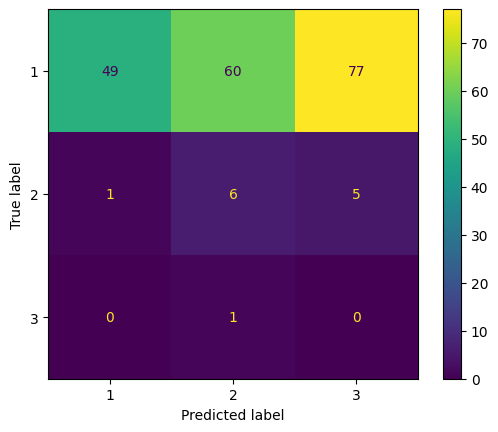

In [5]:
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, ConfusionMatrixDisplay

y_hat = model.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_hat)

confusion_matrix(y_test,y_hat),balanced_accuracy_score(y_test, y_hat)

## gridsearch

In [22]:
from util import OrdinalClassifier

pipe = make_pipeline(
    FourierTransformer(),
    SVC(class_weight='balanced')
    # OrdinalClassifier(SVC(class_weight='balanced'))
)

pipe.steps

[('fouriertransformer', FourierTransformer()),
 ('svc', SVC(class_weight='balanced'))]

In [25]:
params = {
    'svc__C' : [1.5],#np.linspace(0.5,2,10),
    # 'ordinalclassifier__kernel':['poly','rbf','linear'],
    'fouriertransformer__k': [100],
    'fouriertransformer__aggregate': ['low_filter']
    }

In [26]:
skf = StratifiedKFold(n_splits=4)
cv = GridSearchCV(
    pipe, 
    param_grid=params, 
    scoring='balanced_accuracy', 
    n_jobs=-1, 
    cv=skf.split(df_ts, df_train.y)
)
cv.fit(df_ts.values,df_train.y)

cv.best_params_, cv.best_score_

[(663, 100), (663, 100), (663, 100), (663, 100), (663, 100), (663, 100), (663, 100), (663, 100), (663, 100), (663, 100), (663, 100), (663, 100), (663, 100), (663, 100), (663, 100), (663, 100), (663, 100), (663, 100), (663, 100), (663, 100), (663, 100), (663, 100), (663, 100), (663, 100)]


({'fouriertransformer__aggregate': 'low_filter',
  'fouriertransformer__k': 100,
  'svc__C': 1.5},
 0.2850059737156511)

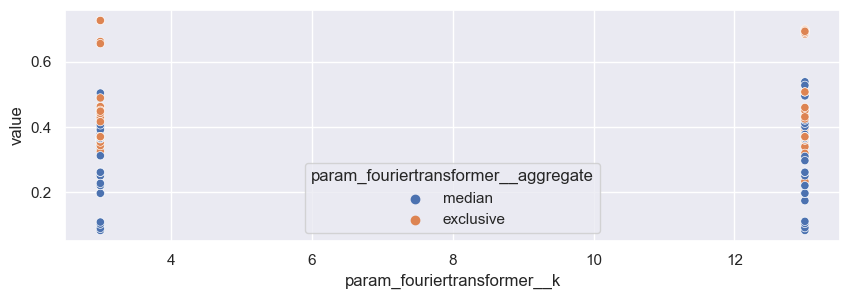

In [ ]:
from util import plot_cv_results
# plot_cv_results(cv, 'param_C', 'param_kernel')
# plot_cv_results(cv, 'param_n_neighbors', 'param_weights')
plot_cv_results(cv, 'param_svc_k', 'param_fouriertransformer__aggregate')

[(663, 100), (663, 100), (663, 100), (663, 100), (663, 100), (663, 100), (663, 100), (663, 100), (663, 100), (663, 100), (663, 100), (663, 100), (663, 100), (663, 100), (663, 100), (663, 100), (663, 100), (663, 100), (663, 100), (663, 100), (663, 100), (663, 100), (663, 100), (663, 100)]


0.5444995864350703

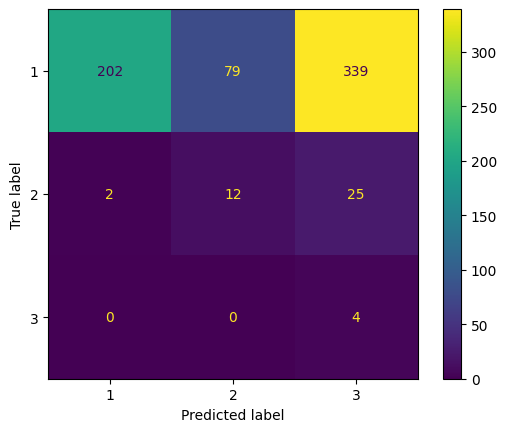

In [29]:
from sklearn.metrics import balanced_accuracy_score, ConfusionMatrixDisplay

y_hat = cv.predict(df_ts.values)
ConfusionMatrixDisplay.from_predictions(df_train.y, y_hat)
balanced_accuracy_score(df_train.y, y_hat)

# Submission

In [30]:
pipe = cv

In [31]:
df_sub = pd.read_csv('data\\test.csv')


[(355, 100), (355, 100), (355, 100), (355, 100), (355, 100), (355, 100), (355, 100), (355, 100), (355, 100), (355, 100), (355, 100), (355, 100), (355, 100), (355, 100), (355, 100), (355, 100), (355, 100), (355, 100), (355, 100), (355, 100), (355, 100), (355, 100), (355, 100), (355, 100)]


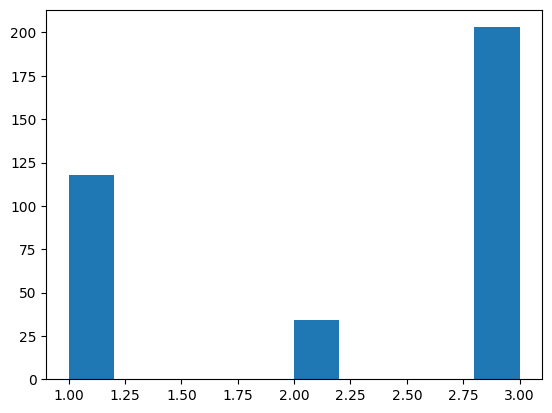

In [32]:
from datetime import datetime
import matplotlib.pyplot as plt
y_sub = pipe.predict(df_sub.iloc[:,4:].values)
plt.hist(y_sub)
submission_df = pd.DataFrame(y_sub,columns=['y'])
submission_df['id'] = df_sub.id
submission_df.set_index('id', inplace=True)
# submission_df.y = submission_df.y
submission_df.to_csv(f'data\\submissions\\summary_{datetime.now().strftime("%H.%M_%d")}.csv')